In [ ]:
#auto-complete
%config Completer.use_jedi = False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks
!ls

/content/drive/My Drive/Colab Notebooks
'01 » ML Pipeline » CS3244 Machine Learning'
'02 » Intro to Python Notebook and Math Review » CS3244 Machine Learning'
'Assignment 1 » CS3244 Machine Learning'
'“Assignment 1 » CS3244 Machine Learning”的副本'
 baseline_trained_dropout
 baseline_trained_regularization
 baseline_trained_regularization_100
'Copy of 04 » Curse of Dimensionality » CS3244 Machine Learning'
'Copy of lenet.ipynb'
'Copy of [Participants Copy] NUS Hackers X SDS: Numpy + Pandas Workshop.ipynb'
'Copy of Tutorial 03 » Linear Classifiers and Logistic Regression » CS3244 Machine Learning'
 cs4243_CW1_progs_A0194484R.ipynb
 cs4243NEWdata
 cs4243_smallest
 model.png
'“Tutorial 03 » Linear Classifiers and Logistic Regression » CS3244 Machine Learning”的副本'
 Untitled


In [ ]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

img_height = 256
img_width = 256
image_size = (img_height, img_width)
batch_size = 16


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/",
    labels='inferred',
    validation_split=0.2,
    subset="training",
    seed=110,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/",
    labels='inferred',
    validation_split=0.2,
    subset="validation",
    seed=110,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
)

whole_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/",
    labels='inferred',
    seed=110,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)
print(type(val_ds))
class_names = train_ds.class_names
print(class_names)
# print(val_ds.file_paths)
absolute_path= val_ds.file_paths

Found 1525 files belonging to 3 classes.
Using 1220 files for training.
Found 1525 files belonging to 3 classes.
Using 305 files for validation.
Found 1525 files belonging to 3 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
['carrying', 'normal', 'threat']


(16, 256, 256, 3)
(16,)


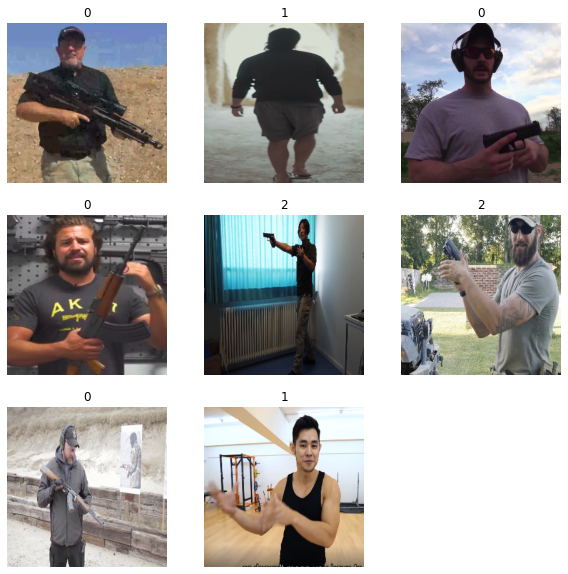

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
import numpy as np
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.experimental.preprocessing.Normalization(mean=[0.485, 0.456, 0.406], variance=[np.square(0.299), 
                                np.square(0.224), 
                                np.square(0.225)])
  ]
)
data_preprocessing = keras.Sequential([layers.experimental.preprocessing.Normalization(mean=[0.485, 0.456, 0.406], variance=[np.square(0.299), 
                                np.square(0.224), 
                                np.square(0.225)])] 
)

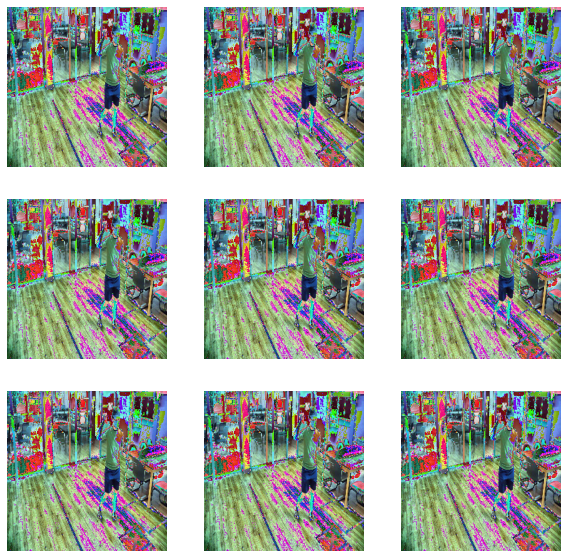

In [ ]:
# showing the rotated and flipped images that were added to the 
# original dataset
#
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [5]:

#Configure the dataset for performance
augmented_train_ds = train_ds.map( lambda x, y: (data_augmentation(x, training=True), y))
preproceesed_val_ds = val_ds.map( lambda x, y: (data_preprocessing(x, training=True), y))

augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
preproceesed_val_ds = preproceesed_val_ds.prefetch(buffer_size=32)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
#standardization

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

num_classes = len(class_names)

model = Sequential([
    # layer 0
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # layer 1
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    BatchNormalization(),
    # layer 2
    layers.Conv2D(32, (3,3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(2,2),
    BatchNormalization(),
    # layer 3
    layers.Conv2D(64, (3,3), padding='same', activation = 'relu'),
   
    layers.MaxPooling2D(2,2),
    BatchNormalization(),
    # layer 4
    layers.Conv2D(128, (3,3), padding='same', activation = 'relu'),
   
    layers.MaxPooling2D(2,2),
    BatchNormalization(),
    # layer 5
    layers.Conv2D(256, (3,3), padding='same', activation = 'relu'),
 
    layers.MaxPooling2D(2,2),
    BatchNormalization(),
    layers.Flatten(),
    # layer 6
    layers.Dense(512, activation = 'relu'),
    BatchNormalization(),
    layers.Dropout( 0.1),
    # layer 7
    layers.Dense(num_classes, activation='softmax')
    
])

In [10]:
#opimizer
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'], run_eagerly = True)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)      

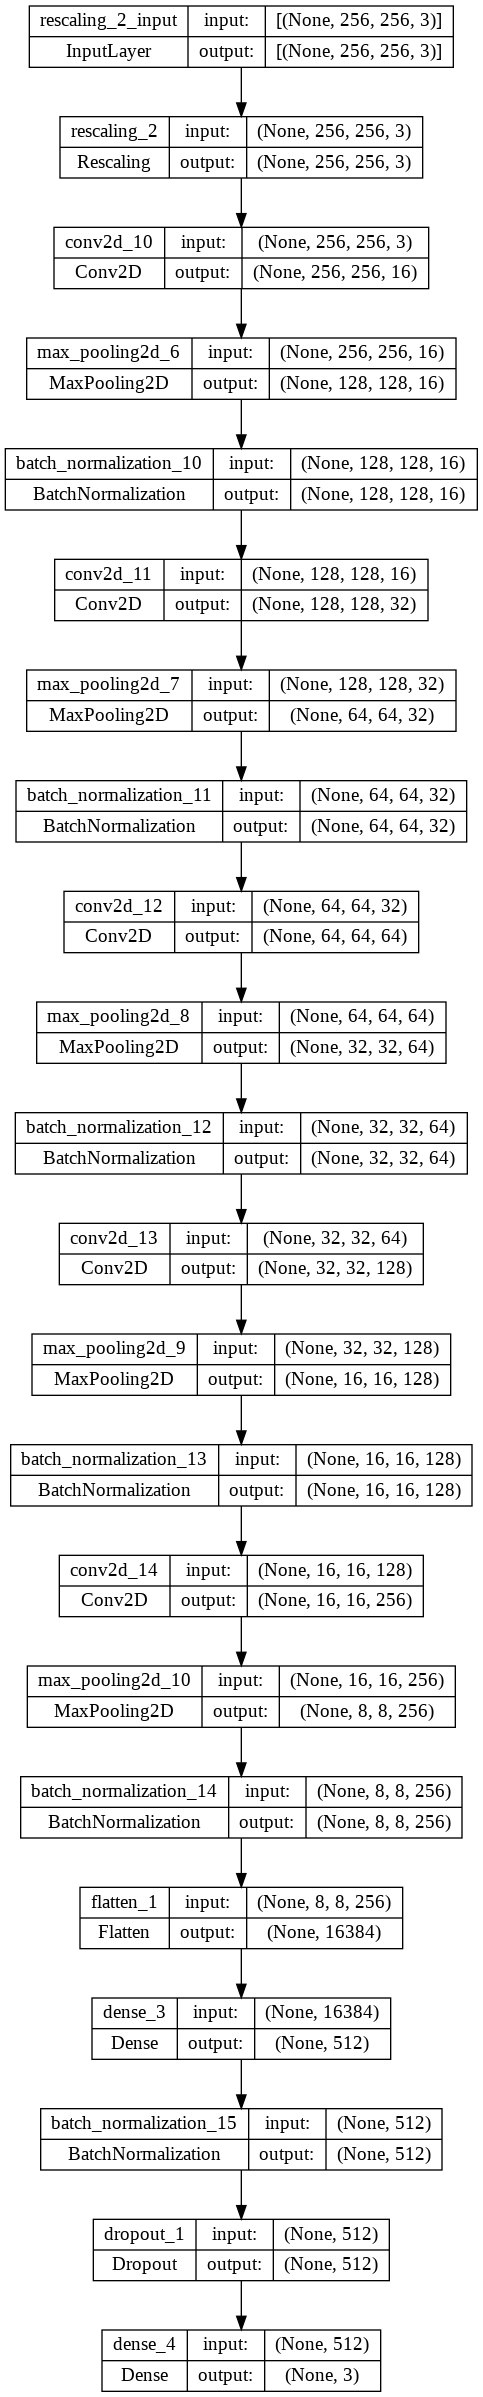

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [16]:
epochs= 30
callback = tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10)
history = model.fit(
  augmented_train_ds,
  validation_data=preproceesed_val_ds,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/30
 1/77 [..............................] - ETA: 5:39 - loss: 0.4848 - sparse_categorical_accuracy: 0.7500

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


77/77 [==============================] - 60s 736ms/step - loss: 0.3197 - sparse_categorical_accuracy: 0.8623 - val_loss: 1.0859 - val_sparse_categorical_accuracy: 0.6525
Epoch 2/30
77/77 [==============================] - 73s 898ms/step - loss: 0.3240 - sparse_categorical_accuracy: 0.8746 - val_loss: 1.1754 - val_sparse_categorical_accuracy: 0.6754
Epoch 3/30
77/77 [==============================] - 66s 806ms/step - loss: 0.2656 - sparse_categorical_accuracy: 0.8975 - val_loss: 1.0761 - val_sparse_categorical_accuracy: 0.6656
Epoch 4/30
77/77 [==============================] - 60s 734ms/step - loss: 0.3045 - sparse_categorical_accuracy: 0.8885 - val_loss: 1.0586 - val_sparse_categorical_accuracy: 0.6852
Epoch 5/30
77/77 [==============================] - 59s 713ms/step - loss: 0.2526 - sparse_categorical_accuracy: 0.9049 - val_loss: 1.1393 - val_sparse_categorical_accuracy: 0.6852
Epoch 6/30
77/77 [==============================] - 60s 731ms/step - loss: 0.2366 - sparse_categorical_acc

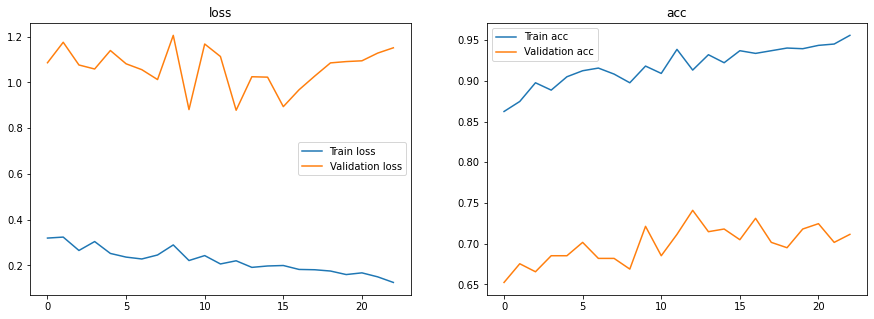

In [17]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history['sparse_categorical_accuracy'], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_sparse_categorical_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
show_final_history(history)#


In [18]:
model.save('/content/drive/MyDrive/Colab Notebooks/baseline_trained_dropout0.1_batchNorm')

In [20]:
import os
import numpy as np
from os import listdir
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# get the path/directory
from tensorflow import keras

# make confution matrix
confution_matrix = np.zeros((3,3), dtype=int)
preproceesed_whole_ds = whole_ds.map( lambda x, y: (data_preprocessing(x, training=True), y))
preproceesed_whole_ds = preproceesed_whole_ds.prefetch(buffer_size=32)

# We found each call of preprocessed_val_ds will shuffle the preprocessed validation dataset, to avoid this, we do two attempts, one is predict on unshuffled
# preprocessed_whole_ds, another one will be introduced in later blocks.
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/baseline_trained_dropout0.1_batchNorm')
predictions = model.predict(preproceesed_whole_ds)
labeled_class = np.concatenate([label for img, label in preproceesed_whole_ds], axis = 0)
print(np.min(labeled_class))
print(np.max(labeled_class))
print(labeled_class)
predicted_class = np.argmax(predictions, axis=1)
# confusion matrix
# https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
# confusion_matrix(labels, predictions)
# The rows of the matrix represent the labels

confusion_matrix = tf.math.confusion_matrix(
    labeled_class,
    predicted_class,
    num_classes=3,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
print(confusion_matrix)
print("correct 0 percentage is:", 100* confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[0][2]))
print("correct 1 percentage is:", 100* confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[1][2]))
print("correct 2 percentage is:", 100* confusion_matrix[2][2]/(confusion_matrix[2][0]+confusion_matrix[2][1]+confusion_matrix[2][2]))

96/96 [==============================] - 46s 471ms/step
0
2
[0 0 0 ... 2 2 2]
tf.Tensor(
[[460  53  12]
 [ 35 457   8]
 [ 30  44 426]], shape=(3, 3), dtype=int32)
correct 0 percentage is: tf.Tensor(87.61904761904762, shape=(), dtype=float64)
correct 1 percentage is: tf.Tensor(91.4, shape=(), dtype=float64)
correct 2 percentage is: tf.Tensor(85.2, shape=(), dtype=float64)


['/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/normal/9_1.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/normal/358_1.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/threat/73_2.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/carrying/372_0.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/normal/486_1.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/threat/189_2.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/threat/195_2.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/threat/39_2.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/carrying/179_0.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/threat/255_2.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/carrying/126_0.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/normal/369_1.png', '/content/drive/My Drive/Colab Notebooks/cs4243NEWdata/carrying/509_0.png', '/content/drive/My Drive/Colab No

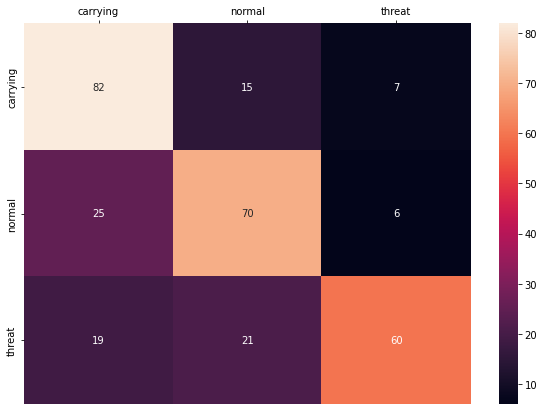

In [38]:
import os 
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import traceback

# To process preprocessed_val_ds and get its accuracy, we derives our own way to iterate images in preprocessed_val_ds.
# If you want to load dropout(0.5) version, just load_model('/content/drive/MyDrive/Colab Notebooks/baseline_trained_dropout0.5_batchNorm')
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/baseline_trained_dropout0.1_batchNorm')
#model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/baseline_trained_dropout0.5_batchNorm')

confution_matrix = np.zeros((3,3), dtype=int)# row = real, col = predict
print(absolute_path)

for image_abs_path in absolute_path:
    # check if the image ends with png
    if (image_abs_path.endswith(".png")):
      try:
        img = keras.preprocessing.image.load_img(image_abs_path, target_size = (img_height, img_width, 3))
        img_array = keras.preprocessing.image.img_to_array(img)#from img name to img array 
        img_array = tf.expand_dims(img_array, 0)  # Create batch axis
        #normalization
        img_array = data_preprocessing(img_array)
        #
        predictions = model.predict(img_array, verbose = 0)
        predicted_class = np.argmax(predictions)
        img_class = int(image_abs_path[-5])
        confution_matrix[img_class][predicted_class] +=1
      except Exception:
        print(image_abs_path)
        traceback.print_exc()


confusion_matrix_np = confution_matrix

classes = ["carrying", "normal", "threat"]
df_cm = pd.DataFrame(confusion_matrix_np, index = [i for i in classes],
                  columns = [i for i in classes])


plt.figure(figsize = (10,7))
ax = sn.heatmap(confusion_matrix_np, annot=True, xticklabels = classes , yticklabels = classes)
ax.xaxis.tick_top()